In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline            

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/wine.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: >

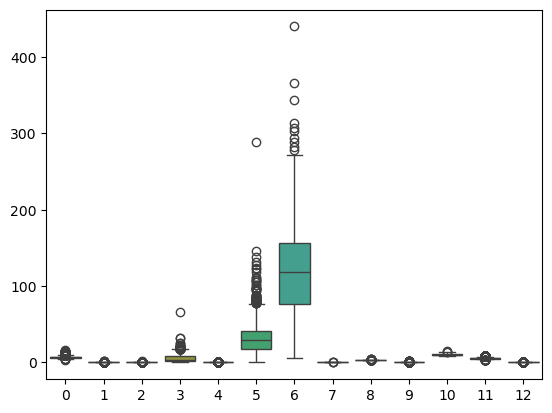

In [5]:
sns.boxplot(data.iloc[:,:])

In [6]:
data[12].value_counts()

12
0    4898
1    1599
Name: count, dtype: int64

In [7]:
X = data.drop(12, axis=1)
y = data[12]

In [8]:
from sklearn.preprocessing import RobustScaler

In [9]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled

array([[ 0.30769231,  2.41176471, -2.21428571, ...,  0.29411765,
        -0.5       , -1.        ],
       [ 0.61538462,  3.47058824, -2.21428571, ...,  1.        ,
        -0.27777778, -1.        ],
       [ 0.61538462,  2.76470588, -1.92857143, ...,  0.82352941,
        -0.27777778, -1.        ],
       ...,
       [-0.38461538, -0.29411765, -0.85714286, ..., -0.29411765,
        -0.5       ,  0.        ],
       [-1.15384615,  0.        , -0.07142857, ..., -0.76470588,
         1.38888889,  1.        ],
       [-0.76923077, -0.47058824,  0.5       , ..., -1.11764706,
         0.83333333,  0.        ]])

In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

2024-09-11 09:08:56.002191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 09:08:59.706138: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-11 09:08:59.706310: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-11 09:08:59.710817: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-11 09:09:00.311922: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [14]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


2024-09-11 09:10:25.031167: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 09:10:25.033317: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) RX Vega 11 Graphics)
2024-09-11 09:10:25.165216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:10:25.165274: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-11 09:10:25.165301: I tensorflow/core/common_runtime/pluggable_device/pluggab

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_valid, y_valid))

Epoch 1/100
1/8 [==>...........................] - ETA: 5s - loss: 0.6446 - accuracy: 0.7380

2024-09-11 09:11:10.382671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:11:10.471794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:11:10.471862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 1s 51ms/step - loss: 0.6244 - accuracy: 0.7981 - val_loss: 0.5982 - val_accuracy: 0.8676
Epoch 2/100
5/8 [=================>............] - ETA: 0s - loss: 0.5783 - accuracy: 0.8884

2024-09-11 09:11:10.846350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:11:10.882058: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:11:10.882126: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 0s 22ms/step - loss: 0.5663 - accuracy: 0.9046 - val_loss: 0.5388 - val_accuracy: 0.9276
Epoch 3/100
8/8 [==============================] - 0s 21ms/step - loss: 0.5030 - accuracy: 0.9569 - val_loss: 0.4720 - val_accuracy: 0.9554
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 0.4344 - accuracy: 0.9700 - val_loss: 0.4026 - val_accuracy: 0.9692
Epoch 5/100
8/8 [==============================] - 0s 20ms/step - loss: 0.3657 - accuracy: 0.9772 - val_loss: 0.3355 - val_accuracy: 0.9769
Epoch 6/100
8/8 [==============================] - 0s 20ms/step - loss: 0.3001 - accuracy: 0.9828 - val_loss: 0.2714 - val_accuracy: 0.9815
Epoch 7/100
8/8 [==============================] - 0s 20ms/step - loss: 0.2387 - accuracy: 0.9859 - val_loss: 0.2131 - val_accuracy: 0.9846
Epoch 8/100
8/8 [==============================] - 0s 20ms/step - loss: 0.1857 - accuracy: 0.9890 - val_loss: 0.1657 - val_accuracy: 0.9885
Epoch 9/100
8/8 [===============

8/8 [==============================] - 0s 22ms/step - loss: 0.0152 - accuracy: 0.9972 - val_loss: 0.0291 - val_accuracy: 0.9954
Epoch 61/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0150 - accuracy: 0.9972 - val_loss: 0.0289 - val_accuracy: 0.9954
Epoch 62/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0149 - accuracy: 0.9972 - val_loss: 0.0288 - val_accuracy: 0.9954
Epoch 63/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0147 - accuracy: 0.9972 - val_loss: 0.0288 - val_accuracy: 0.9954
Epoch 64/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0145 - accuracy: 0.9972 - val_loss: 0.0287 - val_accuracy: 0.9954
Epoch 65/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0143 - accuracy: 0.9972 - val_loss: 0.0286 - val_accuracy: 0.9954
Epoch 66/100
8/8 [==============================] - 0s 27ms/step - loss: 0.0142 - accuracy: 0.9972 - val_loss: 0.0285 - val_accuracy: 0.9954
Epoch 67/100
8/8 [========

In [16]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

41/41 [==============================] - 0s 4ms/step


2024-09-11 09:12:30.070368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:12:30.270932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      0.99      0.99       320

    accuracy                           1.00      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



2024-09-11 09:12:30.271051: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-11 09:12:30.313366: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:12:30.313455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-11 09:12:30.319240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have 

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

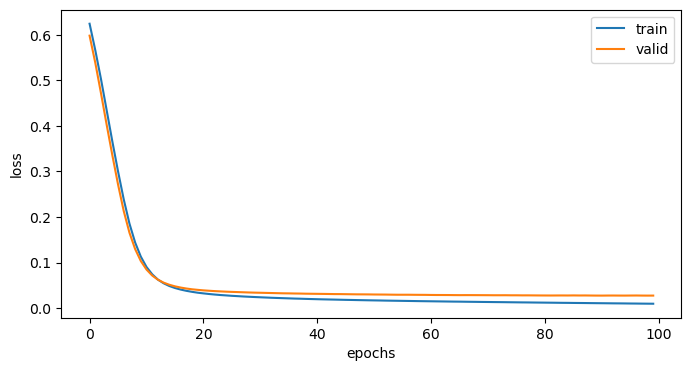

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# EarlyStopping으로 학습 조기 중단 및 저장하기

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [20]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

# ModelCheckpoint
* 모델을 중간에 저장하는 옵션

In [21]:
import os
if not os.path.exists("./model"):
    os.makedirs("./model")
    print(f"Directory /model created.")
else:
    print(f"Directory /model already exists.")

Directory /model already exists.


In [22]:
modelpath = "./model/{epoch:03d}--{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [23]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_valid, y_valid), 
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1000
8/8 [==============================] - 0s 36ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 0.0276 - val_accuracy: 0.9962
Epoch 2/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 0.0276 - val_accuracy: 0.9962
Epoch 3/1000
8/8 [==============================] - 0s 20ms/step - loss: 0.0093 - accuracy: 0.9982 - val_loss: 0.0276 - val_accuracy: 0.9962
Epoch 4/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0092 - accuracy: 0.9982 - val_loss: 0.0275 - val_accuracy: 0.9962
Epoch 5/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.0090 - accuracy: 0.9982 - val_loss: 0.0276 - val_accuracy: 0.9962
Epoch 6/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.0089 - accuracy: 0.9982 - val_loss: 0.0277 - val_accuracy: 0.9962
Epoch 7/1000
8/8 [==============================] - 0s 23ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.0277 - val_accuracy: 0.9962
Epoch 8/1000


# 저장된 베스트 모델을 불러와서 테스트 하기

In [24]:
from tensorflow.keras.models import load_model

In [25]:
best_model = load_model("./model/004--0.0275.keras")  # .h5

In [26]:
best_pred = best_model.predict(X_test)
best_pred = pd.DataFrame(best_pred)
best_pred = best_pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, best_pred))

41/41 [==============================] - 0s 4ms/step


2024-09-11 09:29:16.728086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      0.99      0.99       320

    accuracy                           1.00      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
wine = pd.read_csv("../06machine_learning/data/winequality-white.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [30]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [31]:
wine['quality'].nunique()

7

In [32]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

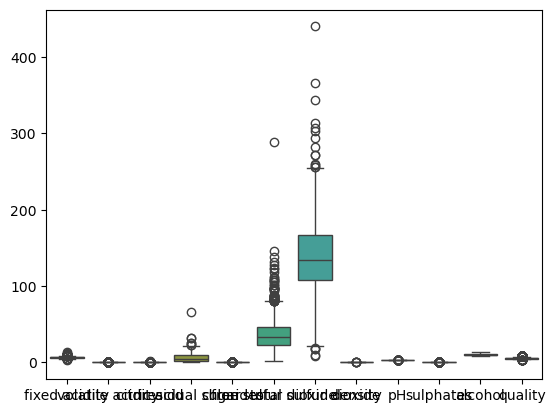

In [34]:
sns.boxplot(wine.iloc[:,:])

In [35]:
from sklearn.preprocessing import RobustScaler

In [36]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

In [37]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [38]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [39]:
rbs = RobustScaler()
X_scaled = rbs.fit_transform(X)


In [107]:
# y = pd.get_dummies(y)
# y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [42]:
print(X_train.shape, X_valid.shape, X_test.shape)

(2938, 11) (980, 11) (980, 11)


In [43]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [150]:
# !pip install imbalanced-learn

In [44]:
from imblearn.over_sampling import ADASYN

In [45]:
adasyn = ADASYN(random_state=10, n_neighbors=2, n_jobs=-1)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [46]:
X_train_adasyn = pd.DataFrame(X_train_adasyn, columns=X.columns)
X_train_adasyn 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.400000,-0.181818,-1.166667,-0.353659,0.500000,-0.521739,0.186441,-0.381496,0.315789,-0.071429,-0.052632
1,0.300000,-0.727273,0.583333,1.134146,0.571429,0.608696,0.372881,1.308966,0.894737,2.214286,-0.684211
2,0.000000,-0.727273,-0.333333,0.560976,-0.285714,-0.217391,-0.355932,0.073101,-0.368421,-0.142857,0.263158
3,0.300000,-0.454545,0.416667,-0.341463,-1.214286,-0.478261,-0.576271,-0.785837,-0.157895,-0.642857,0.526316
4,-0.200000,0.000000,-0.916667,-0.280488,-1.214286,0.608696,-0.135593,-0.651057,0.210526,-0.642857,0.473684
...,...,...,...,...,...,...,...,...,...,...,...
9290,1.437013,-0.047538,0.702604,0.126134,-0.716468,-0.282941,-0.040431,-0.003261,0.319006,0.001091,0.561075
9291,1.727996,-0.000856,0.830979,0.305650,-0.667564,-0.275499,-0.083948,0.248944,0.246936,-0.023361,0.371891
9292,0.523141,-0.135237,0.610880,-0.383995,-0.838843,-0.259792,-0.028155,-0.743358,0.647672,-0.038370,1.159199
9293,0.487635,-0.113718,0.739095,-0.381109,-0.830389,-0.239209,-0.080310,-0.750117,0.703734,-0.089093,1.184116


In [47]:
y_train_adasyn.value_counts()

quality
5    1410
4    1346
8    1345
3    1320
6    1318
9    1317
7    1239
Name: count, dtype: int64

In [48]:
y_train_adasyn = pd.get_dummies(y_train_adasyn)
y_train_adasyn

,3,4,5,6,7,8,9
0,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
9290,False,False,False,False,False,False,True
9291,False,False,False,False,False,False,True
9292,False,False,False,False,False,False,True
9293,False,False,False,False,False,False,True


In [49]:
y_valid = pd.get_dummies(y_valid)
y_valid

,3,4,5,6,7,8,9
4331,False,False,True,False,False,False,False
438,False,False,False,False,True,False,False
198,False,False,True,False,False,False,False
2323,False,False,False,True,False,False,False
1557,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
456,False,False,False,False,True,False,False
2731,False,False,True,False,False,False,False
3438,False,False,True,False,False,False,False
60,False,False,False,True,False,False,False


In [50]:
y_test = pd.get_dummies(y_test)
y_test

,3,4,5,6,7,8,9
3107,False,False,False,True,False,False,False
1049,False,False,False,True,False,False,False
2806,False,False,True,False,False,False,False
3650,False,True,False,False,False,False,False
4362,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
2129,False,False,True,False,False,False,False
479,False,False,False,True,False,False,False
4804,False,True,False,False,False,False,False
2380,False,True,False,False,False,False,False


In [51]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [52]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 7)                 119       
                                                                 
Total params: 5,223
Trainable params: 5,223
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=1000) 
filepath = "./model/white_wine{epoch:04d}__{val_loss:.4f}.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model.fit(X_train_adasyn, y_train_adasyn, epochs=10000, batch_size=5000, validation_data=(X_valid, y_valid),
                   callbacks=[early_stop, model_save])

Epoch 1/10000
1/2 [==============>...............] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998

2024-09-11 10:03:47.522265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 10:03:47.591633: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 10:03:47.591716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


2/2 [==============================] - 1s 349ms/step - loss: 0.0795 - accuracy: 0.9758 - val_loss: 9.4823 - val_accuracy: 0.5755
Epoch 2/10000
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - accuracy: 0.9996

2024-09-11 10:03:47.842885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 10:03:47.877051: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 10:03:47.877131: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


2/2 [==============================] - 0s 87ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 9.7251 - val_accuracy: 0.5653
Epoch 3/10000
2/2 [==============================] - 0s 179ms/step - loss: 0.0791 - accuracy: 0.9713 - val_loss: 9.4388 - val_accuracy: 0.5867
Epoch 4/10000
2/2 [==============================] - 0s 75ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 9.5729 - val_accuracy: 0.5735
Epoch 5/10000
2/2 [==============================] - 0s 68ms/step - loss: 0.0316 - accuracy: 0.9889 - val_loss: 9.6884 - val_accuracy: 0.5704
Epoch 6/10000
2/2 [==============================] - 0s 81ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 9.5889 - val_accuracy: 0.5735
Epoch 7/10000
2/2 [==============================] - 0s 81ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 9.5849 - val_accuracy: 0.5745
Epoch 8/10000
2/2 [==============================] - 0s 86ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 9.6167 - val_accuracy: 0.5724
Epoch 9/10000
2/2 [

2/2 [==============================] - 0s 84ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.5036 - val_accuracy: 0.5765
Epoch 60/10000
2/2 [==============================] - 0s 94ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.5035 - val_accuracy: 0.5755
Epoch 61/10000
2/2 [==============================] - 0s 102ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 9.5036 - val_accuracy: 0.5755
Epoch 62/10000
2/2 [==============================] - 0s 90ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 9.5035 - val_accuracy: 0.5755
Epoch 63/10000
2/2 [==============================] - 0s 74ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.5037 - val_accuracy: 0.5765
Epoch 64/10000
2/2 [==============================] - 0s 72ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.5040 - val_accuracy: 0.5765
Epoch 65/10000
2/2 [==============================] - 0s 86ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.5043 - val_accuracy: 0.5765
Epoch 66/1000

2/2 [==============================] - 0s 100ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5226 - val_accuracy: 0.5765
Epoch 117/10000
2/2 [==============================] - 0s 128ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5231 - val_accuracy: 0.5755
Epoch 118/10000
2/2 [==============================] - 0s 104ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 9.5231 - val_accuracy: 0.5755
Epoch 119/10000
2/2 [==============================] - 0s 78ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 9.5238 - val_accuracy: 0.5755
Epoch 120/10000
2/2 [==============================] - 0s 80ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 9.5246 - val_accuracy: 0.5765
Epoch 121/10000
2/2 [==============================] - 0s 69ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5249 - val_accuracy: 0.5765
Epoch 122/10000
2/2 [==============================] - 0s 89ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5254 - val_accuracy: 0.5765
Epoch

Epoch 173/10000
2/2 [==============================] - 0s 73ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5500 - val_accuracy: 0.5755
Epoch 174/10000
2/2 [==============================] - 0s 85ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5503 - val_accuracy: 0.5755
Epoch 175/10000
2/2 [==============================] - 0s 81ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5512 - val_accuracy: 0.5755
Epoch 176/10000
2/2 [==============================] - 0s 70ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5517 - val_accuracy: 0.5755
Epoch 177/10000
2/2 [==============================] - 0s 102ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5520 - val_accuracy: 0.5765
Epoch 178/10000
2/2 [==============================] - 0s 121ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5525 - val_accuracy: 0.5755
Epoch 179/10000
2/2 [==============================] - 0s 91ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5530 - val_accurac

Epoch 230/10000
2/2 [==============================] - 0s 110ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 9.5783 - val_accuracy: 0.5745
Epoch 231/10000
2/2 [==============================] - 0s 91ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 9.5789 - val_accuracy: 0.5755
Epoch 232/10000
2/2 [==============================] - 0s 93ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 9.5799 - val_accuracy: 0.5765
Epoch 233/10000
2/2 [==============================] - 0s 79ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 9.5804 - val_accuracy: 0.5765
Epoch 234/10000
2/2 [==============================] - 0s 75ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.5810 - val_accuracy: 0.5755
Epoch 235/10000
2/2 [==============================] - 0s 75ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 9.5815 - val_accuracy: 0.5745
Epoch 236/10000
2/2 [==============================] - 0s 70ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 9.5819 - val_accuracy

Epoch 287/10000
2/2 [==============================] - 0s 93ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 9.6097 - val_accuracy: 0.5745
Epoch 288/10000
2/2 [==============================] - 0s 92ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 9.6091 - val_accuracy: 0.5755
Epoch 289/10000
2/2 [==============================] - 0s 85ms/step - loss: 9.9952e-04 - accuracy: 1.0000 - val_loss: 9.6085 - val_accuracy: 0.5755
Epoch 290/10000
2/2 [==============================] - 0s 86ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 9.6091 - val_accuracy: 0.5755
Epoch 291/10000
2/2 [==============================] - 0s 87ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 9.6109 - val_accuracy: 0.5755
Epoch 292/10000
2/2 [==============================] - 0s 81ms/step - loss: 9.9801e-04 - accuracy: 1.0000 - val_loss: 9.6120 - val_accuracy: 0.5755
Epoch 293/10000
2/2 [==============================] - 0s 78ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 9.6127 - val_a

KeyboardInterrupt: 

In [193]:
y_valid

,3,4,5,6,7,8,9
4331,False,False,True,False,False,False,False
438,False,False,False,False,True,False,False
198,False,False,True,False,False,False,False
2323,False,False,False,True,False,False,False
1557,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
456,False,False,False,False,True,False,False
2731,False,False,True,False,False,False,False
3438,False,False,True,False,False,False,False
60,False,False,False,True,False,False,False


In [194]:
wine_best_model = load_model("./model/white_wine0032__1.2257.keras")
wine_pred = wine_best_model.predict(X_test)
wine_pred = pd.DataFrame(wine_pred, columns=y_valid.columns)

31/31 [==============================] - 0s 5ms/step


2024-09-10 15:29:21.262548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [195]:
wine_pred

,3,4,5,6,7,8,9
0,4.787430e-06,0.323064,0.238568,0.299787,0.138471,1.057107e-04,7.054573e-07
1,1.297148e-06,0.000035,0.002891,0.081570,0.341317,5.741845e-01,1.723967e-06
2,1.422047e-08,0.015389,0.540318,0.387200,0.057090,3.441946e-06,1.173062e-10
3,8.363896e-07,0.042890,0.544707,0.275783,0.136594,2.560246e-05,1.144879e-08
4,3.377284e-08,0.001069,0.010333,0.257113,0.587828,1.436569e-01,1.238069e-07
...,...,...,...,...,...,...,...
975,8.633584e-08,0.388208,0.069424,0.135844,0.227480,1.790447e-01,2.416760e-08
976,1.238788e-01,0.000373,0.201254,0.170278,0.357444,1.461935e-01,5.791647e-04
977,7.931296e-04,0.000209,0.150577,0.541969,0.277148,2.929746e-02,6.766827e-06
978,6.334407e-14,0.631184,0.201823,0.163198,0.003795,2.136742e-08,8.654434e-16


In [196]:
y_test_class = y_test.idxmax(axis=1)
y_test_class = y_test_class.reset_index(drop=True)
y_test_class

0      6
1      6
2      5
3      4
4      6
      ..
975    5
976    6
977    4
978    4
979    5
Length: 980, dtype: int64

In [197]:
wine_pred_class = wine_pred.idxmax(axis=1)
wine_pred_class

0      4
1      8
2      5
3      5
4      7
      ..
975    4
976    7
977    6
978    4
979    4
Length: 980, dtype: int64

In [198]:
y.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [199]:
print(classification_report(y_test_class, wine_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.10      0.28      0.15        32
           5       0.55      0.58      0.56       292
           6       0.58      0.35      0.43       440
           7       0.35      0.39      0.37       176
           8       0.17      0.54      0.26        35
           9       0.00      0.00      0.00         1

    accuracy                           0.43       980
   macro avg       0.25      0.30      0.25       980
weighted avg       0.50      0.43      0.44       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()
y2_labeled = le.fit_transform(y2)
y2_labeled

array([3, 3, 3, ..., 3, 4, 3])

XGB로 비교분석

In [60]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y2_labeled, test_size=0.4, stratify=y2_labeled, random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

In [61]:
adasyn = ADASYN(random_state=10, n_neighbors=2, n_jobs=-1)
X_train2_adasyn, y_train2_adasyn = adasyn.fit_resample(X_train2, y_train2)

/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [62]:
X_train2_adasyn = pd.DataFrame(X_train2_adasyn, columns=X.columns)
X_train2_adasyn 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.400000,-0.181818,-1.166667,-0.353659,0.500000,-0.521739,0.186441,-0.381496,0.315789,-0.071429,-0.052632
1,0.300000,-0.727273,0.583333,1.134146,0.571429,0.608696,0.372881,1.308966,0.894737,2.214286,-0.684211
2,0.000000,-0.727273,-0.333333,0.560976,-0.285714,-0.217391,-0.355932,0.073101,-0.368421,-0.142857,0.263158
3,0.300000,-0.454545,0.416667,-0.341463,-1.214286,-0.478261,-0.576271,-0.785837,-0.157895,-0.642857,0.526316
4,-0.200000,0.000000,-0.916667,-0.280488,-1.214286,0.608696,-0.135593,-0.651057,0.210526,-0.642857,0.473684
...,...,...,...,...,...,...,...,...,...,...,...
9290,1.437013,-0.047538,0.702604,0.126134,-0.716468,-0.282941,-0.040431,-0.003261,0.319006,0.001091,0.561075
9291,1.727996,-0.000856,0.830979,0.305650,-0.667564,-0.275499,-0.083948,0.248944,0.246936,-0.023361,0.371891
9292,0.523141,-0.135237,0.610880,-0.383995,-0.838843,-0.259792,-0.028155,-0.743358,0.647672,-0.038370,1.159199
9293,0.487635,-0.113718,0.739095,-0.381109,-0.830389,-0.239209,-0.080310,-0.750117,0.703734,-0.089093,1.184116


In [63]:
y_train2_adasyn = pd.Series(y_train2_adasyn)
y_train2_adasyn.value_counts()

2    1410
1    1346
5    1345
0    1320
3    1318
6    1317
4    1239
Name: count, dtype: int64

In [64]:
# !pip install xgboost

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb = XGBClassifier(max_depth= 5, n_estimators=1000, random_state=10, n_jobs=-1)
xgb.fit(X_train2_adasyn, y_train2_adasyn)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_valid2), le.inverse_transform(xgb_pred)))

              precision    recall  f1-score   support

           3       0.14      0.25      0.18         4
           4       0.46      0.39      0.43        33
           5       0.66      0.62      0.64       291
           6       0.64      0.64      0.64       440
           7       0.55      0.61      0.58       176
           8       0.43      0.46      0.44        35
           9       0.00      0.00      0.00         1

    accuracy                           0.61       980
   macro avg       0.41      0.42      0.41       980
weighted avg       0.61      0.61      0.61       980



In [44]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [47]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

In [48]:
y = pd.get_dummies(y)

In [49]:
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [50]:
from sklearn.preprocessing import RobustScaler

In [51]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y ,random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [54]:
X_train.dtype

dtype('float64')

In [55]:
print(X_train.shape, X_valid.shape, X_test.shape)

(2938, 11) (980, 11) (980, 11)


In [56]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report

In [57]:
model1 = Sequential()
model1.add(Dense(64, input_dim=11, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(7, activation='softmax'))

In [58]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                768       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 7)                 119       
                                                                 
Total params: 7,687
Trainable params: 7,687
Non-traina

In [59]:
print(X_train.shape, y_train.shape)

(2938, 11) (2938, 7)


In [62]:
model1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=1000)
modelpath = "./model/wine_model{epoch:0003d}__{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
history = model1.fit(X_train, y_train, epochs=10000, batch_size=500, validation_data=(X_valid, y_valid), callbacks=[early_stop, checkpointer])

Epoch 1/10000
5/6 [========================>.....] - ETA: 0s - loss: 0.6961 - accuracy: 0.7264

2024-09-10 13:25:53.871275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 13:25:53.958331: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 13:25:53.958403: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 13:25:54.220448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 13:25:54.263323: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to

6/6 [==============================] - 1s 112ms/step - loss: 0.6953 - accuracy: 0.7267 - val_loss: 1.0956 - val_accuracy: 0.5704
Epoch 2/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.6792 - accuracy: 0.7291 - val_loss: 1.1067 - val_accuracy: 0.5724
Epoch 3/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.6700 - accuracy: 0.7338 - val_loss: 1.1088 - val_accuracy: 0.5776
Epoch 4/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.6666 - accuracy: 0.7410 - val_loss: 1.1085 - val_accuracy: 0.5816
Epoch 5/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.6607 - accuracy: 0.7471 - val_loss: 1.1134 - val_accuracy: 0.5827
Epoch 6/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.6562 - accuracy: 0.7495 - val_loss: 1.1138 - val_accuracy: 0.5837
Epoch 7/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.6513 - accuracy: 0.7488 - val_loss: 1.1176 - val_accuracy: 0.5867
Epoch 8/10000
6/6 [

6/6 [==============================] - 0s 51ms/step - loss: 0.3712 - accuracy: 0.8775 - val_loss: 1.6128 - val_accuracy: 0.5755
Epoch 116/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.3719 - accuracy: 0.8713 - val_loss: 1.6118 - val_accuracy: 0.5786
Epoch 117/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.3705 - accuracy: 0.8764 - val_loss: 1.6069 - val_accuracy: 0.5786
Epoch 118/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.3730 - accuracy: 0.8662 - val_loss: 1.6230 - val_accuracy: 0.5765
Epoch 119/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.3696 - accuracy: 0.8730 - val_loss: 1.6389 - val_accuracy: 0.5735
Epoch 120/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.3678 - accuracy: 0.8734 - val_loss: 1.6422 - val_accuracy: 0.5684
Epoch 121/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.3651 - accuracy: 0.8720 - val_loss: 1.6560 - val_accuracy: 0.5776
Epoch 12

6/6 [==============================] - 0s 47ms/step - loss: 0.2751 - accuracy: 0.9183 - val_loss: 1.9710 - val_accuracy: 0.5878
Epoch 173/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.2759 - accuracy: 0.9091 - val_loss: 2.0008 - val_accuracy: 0.5714
Epoch 174/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.2734 - accuracy: 0.9180 - val_loss: 1.9920 - val_accuracy: 0.5867
Epoch 175/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.2669 - accuracy: 0.9190 - val_loss: 2.0175 - val_accuracy: 0.5704
Epoch 176/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.2662 - accuracy: 0.9197 - val_loss: 2.0045 - val_accuracy: 0.5888
Epoch 177/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.2677 - accuracy: 0.9183 - val_loss: 2.0250 - val_accuracy: 0.5806
Epoch 178/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.2617 - accuracy: 0.9200 - val_loss: 2.0505 - val_accuracy: 0.5857
Epoch 17

6/6 [==============================] - 0s 46ms/step - loss: 0.1979 - accuracy: 0.9418 - val_loss: 2.4489 - val_accuracy: 0.5888
Epoch 230/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.1897 - accuracy: 0.9449 - val_loss: 2.4769 - val_accuracy: 0.5939
Epoch 231/10000
6/6 [==============================] - 0s 46ms/step - loss: 0.1913 - accuracy: 0.9442 - val_loss: 2.4951 - val_accuracy: 0.5908
Epoch 232/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.1921 - accuracy: 0.9438 - val_loss: 2.4813 - val_accuracy: 0.5878
Epoch 233/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.1882 - accuracy: 0.9445 - val_loss: 2.4835 - val_accuracy: 0.5837
Epoch 234/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.1846 - accuracy: 0.9489 - val_loss: 2.4790 - val_accuracy: 0.5888
Epoch 235/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.1853 - accuracy: 0.9476 - val_loss: 2.5038 - val_accuracy: 0.5949
Epoch 23

6/6 [==============================] - 0s 49ms/step - loss: 0.1307 - accuracy: 0.9656 - val_loss: 3.0159 - val_accuracy: 0.5918
Epoch 287/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.1259 - accuracy: 0.9697 - val_loss: 3.0116 - val_accuracy: 0.5888
Epoch 288/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.1269 - accuracy: 0.9704 - val_loss: 3.0346 - val_accuracy: 0.5837
Epoch 289/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.1347 - accuracy: 0.9629 - val_loss: 3.0262 - val_accuracy: 0.5867
Epoch 290/10000
6/6 [==============================] - 0s 45ms/step - loss: 0.1387 - accuracy: 0.9636 - val_loss: 3.0635 - val_accuracy: 0.5898
Epoch 291/10000
6/6 [==============================] - 0s 46ms/step - loss: 0.1320 - accuracy: 0.9660 - val_loss: 3.0543 - val_accuracy: 0.5857
Epoch 292/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.1308 - accuracy: 0.9663 - val_loss: 3.1053 - val_accuracy: 0.5847
Epoch 29

6/6 [==============================] - 0s 47ms/step - loss: 0.0833 - accuracy: 0.9830 - val_loss: 3.6147 - val_accuracy: 0.5959
Epoch 344/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0853 - accuracy: 0.9830 - val_loss: 3.6352 - val_accuracy: 0.5990
Epoch 345/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0842 - accuracy: 0.9840 - val_loss: 3.6378 - val_accuracy: 0.6000
Epoch 346/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0818 - accuracy: 0.9837 - val_loss: 3.6576 - val_accuracy: 0.5929
Epoch 347/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.0816 - accuracy: 0.9816 - val_loss: 3.6955 - val_accuracy: 0.5939
Epoch 348/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0821 - accuracy: 0.9806 - val_loss: 3.6917 - val_accuracy: 0.5969
Epoch 349/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0821 - accuracy: 0.9833 - val_loss: 3.6719 - val_accuracy: 0.5949
Epoch 35

6/6 [==============================] - 0s 62ms/step - loss: 0.0564 - accuracy: 0.9894 - val_loss: 4.2673 - val_accuracy: 0.5939
Epoch 401/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0589 - accuracy: 0.9888 - val_loss: 4.3001 - val_accuracy: 0.5980
Epoch 402/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0586 - accuracy: 0.9894 - val_loss: 4.2624 - val_accuracy: 0.5918
Epoch 403/10000
6/6 [==============================] - 0s 81ms/step - loss: 0.0578 - accuracy: 0.9888 - val_loss: 4.2511 - val_accuracy: 0.5939
Epoch 404/10000
6/6 [==============================] - 0s 77ms/step - loss: 0.0590 - accuracy: 0.9884 - val_loss: 4.2776 - val_accuracy: 0.5929
Epoch 405/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0553 - accuracy: 0.9905 - val_loss: 4.2659 - val_accuracy: 0.5929
Epoch 406/10000
6/6 [==============================] - 0s 86ms/step - loss: 0.0557 - accuracy: 0.9894 - val_loss: 4.2932 - val_accuracy: 0.5939
Epoch 40

6/6 [==============================] - 0s 49ms/step - loss: 0.0448 - accuracy: 0.9918 - val_loss: 4.8663 - val_accuracy: 0.5959
Epoch 458/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0456 - accuracy: 0.9915 - val_loss: 4.9075 - val_accuracy: 0.5969
Epoch 459/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0525 - accuracy: 0.9891 - val_loss: 4.8521 - val_accuracy: 0.5929
Epoch 460/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0477 - accuracy: 0.9912 - val_loss: 4.8502 - val_accuracy: 0.6020
Epoch 461/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0467 - accuracy: 0.9901 - val_loss: 4.8796 - val_accuracy: 0.5929
Epoch 462/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.0409 - accuracy: 0.9942 - val_loss: 4.9165 - val_accuracy: 0.5959
Epoch 463/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0435 - accuracy: 0.9918 - val_loss: 4.9134 - val_accuracy: 0.5939
Epoch 46

6/6 [==============================] - 0s 50ms/step - loss: 0.0285 - accuracy: 0.9946 - val_loss: 5.3216 - val_accuracy: 0.5939
Epoch 515/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0289 - accuracy: 0.9949 - val_loss: 5.2984 - val_accuracy: 0.6020
Epoch 516/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.0300 - accuracy: 0.9935 - val_loss: 5.3174 - val_accuracy: 0.5949
Epoch 517/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.0296 - accuracy: 0.9946 - val_loss: 5.3697 - val_accuracy: 0.5980
Epoch 518/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0276 - accuracy: 0.9946 - val_loss: 5.3823 - val_accuracy: 0.5908
Epoch 519/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0291 - accuracy: 0.9952 - val_loss: 5.3465 - val_accuracy: 0.5980
Epoch 520/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0268 - accuracy: 0.9956 - val_loss: 5.3838 - val_accuracy: 0.5939
Epoch 52

6/6 [==============================] - 0s 47ms/step - loss: 0.0197 - accuracy: 0.9956 - val_loss: 5.7020 - val_accuracy: 0.5929
Epoch 572/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0210 - accuracy: 0.9959 - val_loss: 5.7194 - val_accuracy: 0.5959
Epoch 573/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0215 - accuracy: 0.9963 - val_loss: 5.7395 - val_accuracy: 0.5929
Epoch 574/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0228 - accuracy: 0.9949 - val_loss: 5.7470 - val_accuracy: 0.5929
Epoch 575/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0197 - accuracy: 0.9966 - val_loss: 5.7246 - val_accuracy: 0.5969
Epoch 576/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0195 - accuracy: 0.9959 - val_loss: 5.7421 - val_accuracy: 0.5959
Epoch 577/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.0211 - accuracy: 0.9956 - val_loss: 5.7712 - val_accuracy: 0.5918
Epoch 57

Epoch 628/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0185 - accuracy: 0.9966 - val_loss: 6.0786 - val_accuracy: 0.5929
Epoch 629/10000
6/6 [==============================] - 0s 84ms/step - loss: 0.0192 - accuracy: 0.9959 - val_loss: 6.1194 - val_accuracy: 0.5898
Epoch 630/10000
6/6 [==============================] - 0s 89ms/step - loss: 0.0173 - accuracy: 0.9969 - val_loss: 6.0696 - val_accuracy: 0.5898
Epoch 631/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0207 - accuracy: 0.9956 - val_loss: 6.0152 - val_accuracy: 0.5969
Epoch 632/10000
6/6 [==============================] - 0s 84ms/step - loss: 0.0209 - accuracy: 0.9959 - val_loss: 6.0785 - val_accuracy: 0.5969
Epoch 633/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0191 - accuracy: 0.9963 - val_loss: 6.1293 - val_accuracy: 0.5929
Epoch 634/10000
6/6 [==============================] - 0s 94ms/step - loss: 0.0171 - accuracy: 0.9963 - val_loss: 6.0777 - val_accuracy:

Epoch 685/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0182 - accuracy: 0.9959 - val_loss: 6.3296 - val_accuracy: 0.5949
Epoch 686/10000
6/6 [==============================] - 0s 73ms/step - loss: 0.0144 - accuracy: 0.9976 - val_loss: 6.2318 - val_accuracy: 0.5969
Epoch 687/10000
6/6 [==============================] - 0s 74ms/step - loss: 0.0141 - accuracy: 0.9976 - val_loss: 6.2687 - val_accuracy: 0.5959
Epoch 688/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0138 - accuracy: 0.9983 - val_loss: 6.3293 - val_accuracy: 0.5939
Epoch 689/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.0142 - accuracy: 0.9976 - val_loss: 6.2018 - val_accuracy: 0.5878
Epoch 690/10000
6/6 [==============================] - 0s 82ms/step - loss: 0.0186 - accuracy: 0.9969 - val_loss: 6.3459 - val_accuracy: 0.5949
Epoch 691/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0162 - accuracy: 0.9976 - val_loss: 6.2805 - val_accuracy:

Epoch 742/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.0154 - accuracy: 0.9976 - val_loss: 6.4385 - val_accuracy: 0.5867
Epoch 743/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0153 - accuracy: 0.9973 - val_loss: 6.5367 - val_accuracy: 0.5949
Epoch 744/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0149 - accuracy: 0.9973 - val_loss: 6.4887 - val_accuracy: 0.5939
Epoch 745/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0137 - accuracy: 0.9966 - val_loss: 6.5214 - val_accuracy: 0.5888
Epoch 746/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0156 - accuracy: 0.9963 - val_loss: 6.6450 - val_accuracy: 0.5908
Epoch 747/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0145 - accuracy: 0.9980 - val_loss: 6.5177 - val_accuracy: 0.5929
Epoch 748/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0177 - accuracy: 0.9952 - val_loss: 6.5726 - val_accuracy:

Epoch 799/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 6.7942 - val_accuracy: 0.5867
Epoch 800/10000
6/6 [==============================] - 0s 61ms/step - loss: 0.0177 - accuracy: 0.9969 - val_loss: 6.8127 - val_accuracy: 0.5908
Epoch 801/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0128 - accuracy: 0.9966 - val_loss: 6.9291 - val_accuracy: 0.5908
Epoch 802/10000
6/6 [==============================] - 0s 46ms/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 6.7815 - val_accuracy: 0.5959
Epoch 803/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0108 - accuracy: 0.9980 - val_loss: 6.8269 - val_accuracy: 0.5929
Epoch 804/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0122 - accuracy: 0.9973 - val_loss: 6.8664 - val_accuracy: 0.5898
Epoch 805/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0124 - accuracy: 0.9976 - val_loss: 6.8435 - val_accuracy:

Epoch 856/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0196 - accuracy: 0.9966 - val_loss: 6.5252 - val_accuracy: 0.5959
Epoch 857/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0165 - accuracy: 0.9973 - val_loss: 6.6752 - val_accuracy: 0.5898
Epoch 858/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0172 - accuracy: 0.9966 - val_loss: 6.5243 - val_accuracy: 0.5939
Epoch 859/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0138 - accuracy: 0.9980 - val_loss: 6.6866 - val_accuracy: 0.5847
Epoch 860/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0123 - accuracy: 0.9980 - val_loss: 6.6210 - val_accuracy: 0.5939
Epoch 861/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 6.6663 - val_accuracy: 0.5939
Epoch 862/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0106 - accuracy: 0.9980 - val_loss: 6.6418 - val_accuracy:

Epoch 913/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 6.9283 - val_accuracy: 0.5918
Epoch 914/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 6.9797 - val_accuracy: 0.5918
Epoch 915/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 6.9663 - val_accuracy: 0.5908
Epoch 916/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 7.0047 - val_accuracy: 0.5918
Epoch 917/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0075 - accuracy: 0.9973 - val_loss: 6.9707 - val_accuracy: 0.5888
Epoch 918/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 7.0108 - val_accuracy: 0.5908
Epoch 919/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 6.9969 - val_accuracy:

Epoch 970/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 7.2117 - val_accuracy: 0.5878
Epoch 971/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 7.1579 - val_accuracy: 0.5867
Epoch 972/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 7.2488 - val_accuracy: 0.5908
Epoch 973/10000
6/6 [==============================] - 0s 46ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 7.1844 - val_accuracy: 0.5878
Epoch 974/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0083 - accuracy: 0.9983 - val_loss: 7.2408 - val_accuracy: 0.5898
Epoch 975/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 7.2466 - val_accuracy: 0.5878
Epoch 976/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 7.2015 - val_accuracy:

In [ ]:
wine_best_model = load_model("./model/wine_model019__1.0356.keras")
pred = wine_best_model.predict(X_test)
pred = pd.DataFrame(pred)
pred


In [ ]:
# 각 행에서 확률이 가장 높은 클래스의 인덱스를 찾기
predicted_classes = pred.idxmax(axis=1)

# 결과 출력
print(predicted_classes)

In [ ]:
# 각 행에서 확률이 가장 높은 클래스의 인덱스를 찾기
y_classes = y_test.idxmax(axis=1)

# 결과 출력
print(y_classes)

In [90]:
y_test

,3,4,5,6,7,8,9
1815,False,False,False,True,False,False,False
4590,False,False,False,True,False,False,False
452,False,False,False,False,True,False,False
3761,False,False,False,False,True,False,False
3899,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
1731,False,False,False,True,False,False,False
4609,False,True,False,False,False,False,False
460,False,False,True,False,False,False,False
301,False,False,False,True,False,False,False


In [91]:
print(classification_report(y_classes, predicted_classes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.01      0.75      0.01         4
           4       0.01      0.03      0.01        33
           5       0.00      0.00      0.00       291
           6       0.00      0.00      0.00       440
           7       0.00      0.00      0.00       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.00       980
   macro avg       0.00      0.09      0.00       980
weighted avg       0.00      0.00      0.00       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


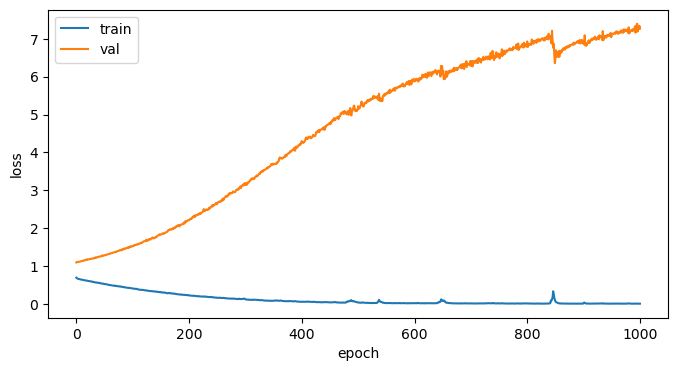

In [84]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()
y_labeled = le.fit_transform(y2)
y_labeled

array([3, 3, 3, ..., 3, 4, 3])

In [75]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y_labeled, test_size=0.4, stratify=y_labeled ,random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

In [76]:
# !pip install xgboost

In [78]:
from xgboost import XGBClassifier

array([6, 6, 5, 4, 6, 6, 7, 5, 6, 6, 6, 6, 7, 6, 6, 7, 6, 5, 7, 6, 5, 6,
       6, 5, 5, 4, 7, 6, 6, 6, 6, 5, 5, 6, 7, 6, 5, 5, 6, 7, 7, 6, 5, 7,
       5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 7, 6, 6, 6, 6, 5, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 7, 7, 5, 6, 6, 6, 7, 7, 5, 8, 7, 5, 6, 7,
       7, 5, 7, 7, 5, 6, 6, 5, 6, 7, 7, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 7, 5, 7, 6, 6, 5, 6, 7, 5, 7, 6, 6, 7, 7, 7, 4, 6, 6,
       6, 6, 5, 4, 7, 5, 5, 7, 7, 6, 6, 7, 5, 7, 7, 5, 6, 6, 5, 7, 7, 6,
       6, 8, 6, 6, 5, 7, 6, 6, 6, 8, 5, 7, 6, 5, 6, 6, 5, 6, 6, 6, 7, 6,
       6, 5, 7, 7, 6, 6, 5, 7, 7, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 8, 6,
       6, 7, 5, 8, 7, 6, 7, 5, 6, 5, 6, 5, 6, 6, 6, 6, 8, 6, 6, 7, 6, 6,
       6, 5, 6, 7, 6, 5, 7, 7, 6, 8, 7, 8, 5, 3, 5, 5, 7, 7, 5, 7, 6, 5,
       6, 6, 8, 7, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 3, 5, 6, 6, 6, 6, 5, 7,
       6, 6, 4, 5, 7, 6, 6, 6, 6, 4, 7, 5, 7, 7, 5, 6, 6, 5, 6, 7, 7, 6,
       6, 6, 5, 7, 6, 6, 6, 6, 5, 6, 6, 7, 5, 7, 6,

In [89]:
xgb = XGBClassifier(max_depth=5, n_estimators=1000, n_jobs=-1, random_state=10)
xgb.fit(X_train2, y_train2)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_test2), le.inverse_transform(xgb_pred)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        32
           5       0.32      0.30      0.31       292
           6       0.47      0.51      0.49       440
           7       0.21      0.21      0.21       176
           8       0.10      0.06      0.07        35
           9       0.00      0.00      0.00         1

    accuracy                           0.36       980
   macro avg       0.16      0.16      0.16       980
weighted avg       0.35      0.36      0.35       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r